In [1]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BDD import get_unique_table_num as gu2
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


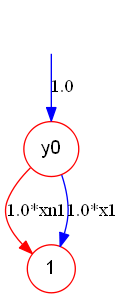

In [2]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0','xn1']
[x0,y0,x1,y1,xn0,xn1]=symbols(A)
U=np.array([xn1,x1])
var=[Index('y0')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
tdd.show()
# ts2=Tensor(U,var)

Max nodes: 2


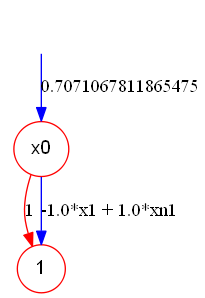

In [3]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
# tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

Max nodes: 4
0.18302655220031738
4
37
17


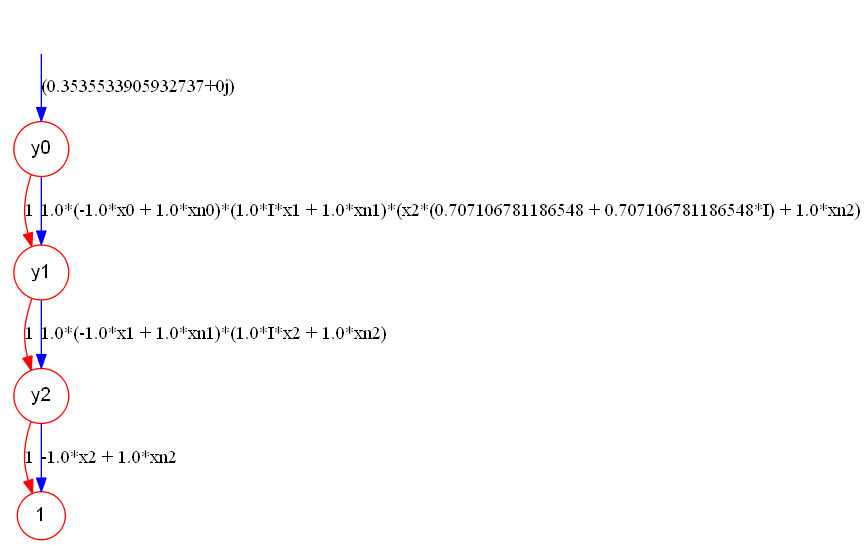

In [16]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
Ini_TDD(indices)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
print(gu1())
print(gu2())
tdd.show()

In [17]:
path='Benchmarks/'
x=[]
y=[]
z=[]
for n in range(2,31,1):
    t1=time.time()
    file_name='qft_'+str(n)+'.qasm'
    cir=QuantumCircuit.from_qasm_file(path+file_name)
    tn,indices=cir_2_tn(cir)
    for k in range(n):
        x_k='x'+str(k)
        xn_k='xn'+str(k)
        s=Symbol(x_k)
        ns=Symbol(xn_k)
        U=np.array([ns,s])
    #     U=np.array([1,0])
        temp_ts=Tensor(U,[Index(x_k)])
        tn.tensors.insert(0,temp_ts)
    Ini_TDD(indices)
    tdd=tn.cont()
    t=time.time()-t1
    print(n,t)
    print(gu1())
    print(gu2())
    x.append(n)
    y.append(t)
    z.append(gu1()+gu2())

Max nodes: 3
2 0.06298017501831055
20
9
Max nodes: 4
3 0.056916236877441406
37
17
Max nodes: 5
4 0.059064388275146484
60
29
Max nodes: 6
5 0.06496024131774902
88
46
Max nodes: 7
6 0.07899928092956543
122
69
Max nodes: 8
7 0.0859982967376709
163
99
Max nodes: 9
8 0.09299993515014648
212
137
Max nodes: 10
9 0.11904740333557129
270
184
Max nodes: 11
10 0.21796488761901855
338
241
Max nodes: 12
11 0.1849527359008789
417
309
Max nodes: 13
12 0.1980433464050293
508
389
Max nodes: 14
13 0.3390231132507324
612
482
Max nodes: 15
14 0.25296616554260254
730
589
Max nodes: 16
15 0.37000370025634766
863
711
Max nodes: 17
16 0.3529989719390869
1012
849
Max nodes: 18
17 0.4760439395904541
1178
1004
Max nodes: 19
18 0.4919850826263428
1362
1177
Max nodes: 20
19 0.5660004615783691
1565
1369
Max nodes: 21
20 0.6289670467376709
1788
1581
Max nodes: 22
21 0.7130329608917236
2032
1814
Max nodes: 23
22 0.7090036869049072
2298
2069
Max nodes: 24
23 0.7959954738616943
2586
2325
Max nodes: 25
24 0.898010969161

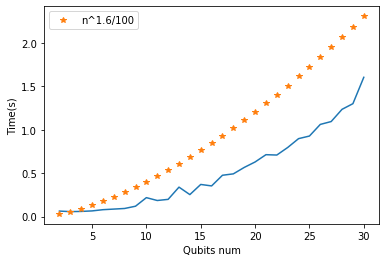

In [22]:
# y=[log(k) for k in y]
plt.plot(x,y)
k=[t**1.6/100 for t in x]
plt.plot(x,k,'*',label='n^1.6/100')
plt.xlabel("Qubits num")
plt.ylabel("Time(s)")
plt.legend()

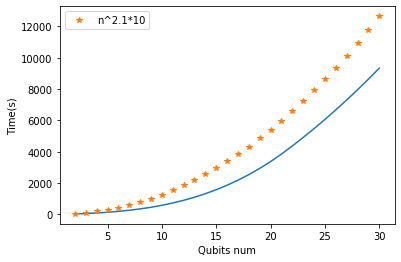

In [23]:
# z=[log(k) for k in z]
plt.plot(x,z)
k=[t**2.1*10 for t in x]
plt.plot(x,k,'*',label='n^2.1*10')
plt.xlabel("Qubits num")
plt.ylabel("Time(s)")
plt.legend()

In [8]:
# Ini_TDD(['x0','y0','x1','y1'])
# x=symbols('x0')
# nx=symbols('xn0')
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# # U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
# U=reshape2(U)
# # print(U)
# var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
# ts1=Tensor(U,var)
# tdd=ts1.tdd()
# print(tdd.node_number())
# tdd.show()

Max nodes: 5
51
10


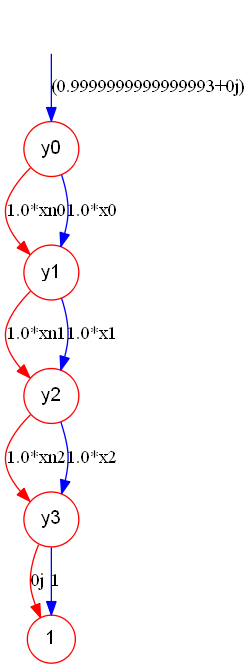

In [9]:
def veri_bv(n):

    syms=[]
    for k in range(n):
        syms.append(symbols('x'+str(k)))
        syms.append(symbols('xn'+str(k)))
        
    tn=TensorNetwork([])
    U=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
        
    U=np.array([0,1])
    var=[Index('x'+str(n))]
    ts=Tensor(U,var)
    tn.tensors.append(ts)
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    for k in range(n):
        U=np.array([[1,0,0,0],[0,1,0,0],[0,0,syms[2*k+1],syms[2*k]],[0,0,syms[2*k],syms[2*k+1]]])
        U=reshape2(U)
        var=[Index('x'+str(k)+'_1'),Index('x'+str(k)+'_2'),Index('x'+str(n)+'_'+str(k+1)),Index('x'+str(n)+'_'+str(k+2))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    for k in range(n):
        var=[Index('x'+str(k)+'_2'),Index('y'+str(k))]
        ts=Tensor(H,var)
        tn.tensors.append(ts)

    var=[Index('x'+str(n)+'_'+str(n+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n):
        var.append('x'+str(k))
        var.append('x'+str(k)+'_1')
        var.append('x'+str(k)+'_2')
        var.append('y'+str(k))
    var.append('x'+str(n))
    
    for k in range(n+1):
        var.append('x'+str(n)+'_'+str(k+1))
    var.append('y'+str(n))
    Ini_TDD(var)
    
    tdd=tn.cont()
    print(gu1())
    print(gu2())
    return tdd

tdd=veri_bv(3)
tdd.show()

In [10]:
def toffoli(n):
    """The matrix of C^n(X)"""
    T=np.eye(2**(n+1))
    T[2**(n+1)-2,2**(n+1)-2]=0
    T[2**(n+1)-1,2**(n+1)-1]=0
    T[2**(n+1)-2,2**(n+1)-1]=1
    T[2**(n+1)-1,2**(n+1)-2]=1
    return T

Max nodes: 5
59
14


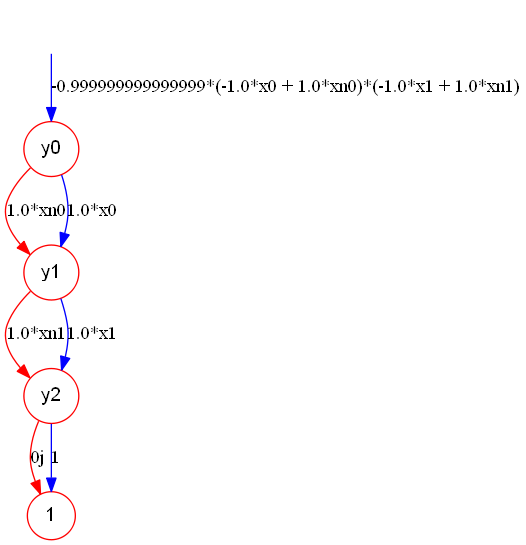

In [11]:
n=2
U=toffoli(n)
U=reshape2(U)
s0=symbols('x0')
s1=symbols('x1')
sn0=symbols('xn0')
sn1=symbols('xn1')
X0=np.array([[s0,sn0],[sn0,s0]])
X1=np.array([[s1,sn1],[sn1,s1]])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
X=np.array([[0,1],[1,0]])
CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CX=reshape2(CX)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(n))]
ts=Tensor(k1,var)
tn.tensors.append(ts)

#add H gate
for k in range(n+1):
    var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X^s gate
var=[Index('x0_1'),Index('x0_2')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_1'),Index('x1_2')]
ts=Tensor(X1,var)
tn.tensors.append(ts)

#add toffoli gate
var=[]
for k in range(n):
    var.append(Index('x'+str(k)+'_2'))
    var.append(Index('x'+str(k)+'_3'))
var.append(Index('x'+str(n)+'_1'))
var.append(Index('x'+str(n)+'_2'))
ts=Tensor(U,var)
tn.tensors.append(ts)

#add X^s gate
var=[Index('x0_3'),Index('x0_4')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_3'),Index('x1_4')]
ts=Tensor(X1,var)
tn.tensors.append(ts)


#add H gate
for k in range(n):
    var=[Index('x'+str(k)+'_4'),Index('x'+str(k)+'_5')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X gate
for k in range(n):
    var=[Index('x'+str(k)+'_5'),Index('x'+str(k)+'_6')]
    ts=Tensor(X,var)
    tn.tensors.append(ts)
    
var=[Index('x1_6'),Index('x1_7')]
ts=Tensor(H,var)
tn.tensors.append(ts)    
    
var=[Index('x0_6'),Index('x0_7'),Index('x1_7'),Index('x1_8')]
ts=Tensor(CX,var)
tn.tensors.append(ts)  

var=[Index('x1_8'),Index('x1_9')]
ts=Tensor(H,var)
tn.tensors.append(ts) 
    
var=[Index('x0_7'),Index('x0_8')]
ts=Tensor(X,var)
tn.tensors.append(ts)     

var=[Index('x1_9'),Index('x1_10')]
ts=Tensor(X,var)
tn.tensors.append(ts)

var=[Index('x0_8'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x1_10'),Index('y1')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x2_2'),Index('y2')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[]
for k in range(n+1):
    var.append('x'+str(k))
    for k1 in range(11):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var)
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()